# VHR example
Let's use EOReader with Very High Resolution data.

<div class="alert alert-warning">
  
<strong>Warning:</strong> 
   <li> We do not provide Pleiades data
   <li> You will need <strong>matplotlib</strong> to complete this tutorial
</div>

In [1]:
import os
import glob

# First of all, we need some VHR data, let's use Pleiades data
path = os.path.abspath(glob.glob(os.path.join("/", "*", "DATA", "PRODS", "PLEIADES", "5547047101", "IMG_PHR1A_PMS_001"))[0])

In [2]:
# Create logger
import logging

logger = logging.getLogger("eoreader")
logger.setLevel(logging.DEBUG)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

In [3]:
from eoreader.reader import Reader

# Create the reader
eoreader = Reader()

In [4]:
from eoreader.bands.alias import *

# Open your product
prod = eoreader.open(path)
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")

# Please be aware that EOReader will always work in UTM projection, so if you give WGS84 data,
# EOReader will reproject the stacks and this can be time consuming

Acquisition datetime: 2020-05-11 02:31:58
Condensed name: 20200511T023158_PLD_ORT_PMS


In [5]:
# Here, if you want to orthorectify or pansharpen your data manually, you can set your stack here.
# If you do not provide this stack but you give a non-orthorectified product to EOReader 
# (ie. SEN or PRJ products for Pleiades), you must provide a DEM to orthorectify correctly the data
# prod.ortho_stack = ""
from eoreader.env_vars import DEM_PATH
os.environ[DEM_PATH] = os.path.abspath(glob.glob(os.path.join("/", "*", "DS2", "BASES_DE_DONNEES", "GLOBAL", "MERIT_Hydrologically_Adjusted_Elevations", "MERIT_DEM.vrt"))[0])

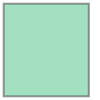

In [6]:
# Open here some more interesting geographical data: extent
extent = prod.extent()
extent.geometry.to_crs("EPSG:4326").iat[0]  # Display

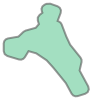

In [7]:
# Open here some more interesting geographical data: footprint
footprint = prod.footprint()
footprint.geometry.to_crs("EPSG:4326").iat[0]  # Display

In [8]:
# Select the bands you want to load
bands = [GREEN, NDVI, TIR_1, CLOUDS, HILLSHADE]

# Be sure they exist for Pleiades sensor:
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands)) # Pleiades doesn't provide TIR and SHADOWS bands

['GREEN', 'NDVI', 'CLOUDS', 'HILLSHADE']


In [9]:
# Load those bands as a dict of xarray.DataArray
band_dict = prod.load(ok_bands)
band_dict[GREEN]

2021-06-08 16:39:35,865 - eoreader - DEBUG - Loading bands ['RED', 'GREEN', 'NIR']
2021-06-08 16:39:35,865 - eoreader - DEBUG - Read RED
2021-06-08 16:39:35,964 - eoreader - INFO - Reprojecting band RED to UTM with a 0.5 m resolution.
2021-06-08 16:40:04,439 - eoreader - DEBUG - Manage invalid pixels for band RED
2021-06-08 16:40:14,069 - eoreader - DEBUG - Read GREEN
2021-06-08 16:40:14,190 - eoreader - INFO - Reprojecting band GREEN to UTM with a 0.5 m resolution.
2021-06-08 16:40:43,862 - eoreader - DEBUG - Manage invalid pixels for band GREEN
2021-06-08 16:40:53,653 - eoreader - DEBUG - Read NIR
2021-06-08 16:40:53,757 - eoreader - INFO - Reprojecting band NIR to UTM with a 0.5 m resolution.
2021-06-08 16:41:23,333 - eoreader - DEBUG - Manage invalid pixels for band NIR
2021-06-08 16:41:33,516 - eoreader - DEBUG - Loading index ['NDVI']
2021-06-08 16:41:34,500 - eoreader - DEBUG - Loading DEM bands ['HILLSHADE']
2021-06-08 16:41:34,500 - eoreader - DEBUG - Warping DEM for IMG_PHR1A

<xarray.DataArray 'DIM_PHR1A_PMS_202005110231585_ORT_5547047101' (band: 1, y: 18124, x: 16754)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 7.024e+05 7.024e+05 ... 7.108e+05 7.108e+05
  * y            (y) float64 9.689e+06 9.689e+06 9.689e+06 ... 9.68e+06 9.68e+06
  * band         (band) int32 2
    spatial_ref  int32 0
Attributes: (12/19)
    RADIANCE_BIAS:                         0
    RADIANCE_CALIBRATION_DATE:             2020-04-01T16:00:00.000Z
    RADIANCE_GAIN:                         8.92
    RADIANCE_MEASURE_DESC:                 Raw radiometric count (DN) to TOA ...
    RADIANCE_MEASURE_UNCERTAINTY:          Specification accuracy value
    RADIANCE_MEASURE_UNIT:                 watt/m2/steradians/micrometers
    ...                                    ...
    SPECTRAL_RANGE_MEASURE_DESC:           Spectral range value of raw radiom...
    SPECTRAL_RANGE_MEASURE_UNCERTAINTY:    Specification accuracy value
    SPECTRAL_RANGE_MEASURE_UNIT:           micrometers
    SPECTRAL_RANGE_MIN:                    0.43
    scale_factor:                          1.0
    add_offset:                            0.0

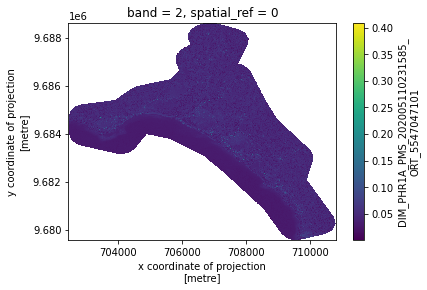

In [10]:
# The nan corresponds to the nodata you see on the footprint
%matplotlib inline

# Plot a subsampled version
band_dict[GREEN][:, ::10, ::10].plot()

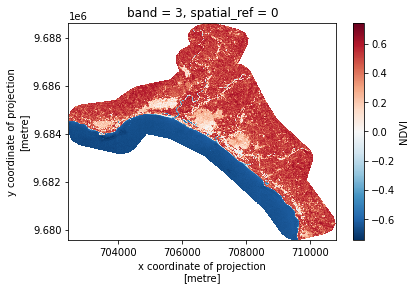

In [11]:
# Plot a subsampled version
band_dict[NDVI][:, ::10, ::10].plot()

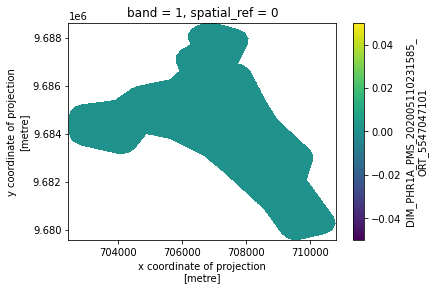

In [12]:
# Plot a subsampled version
band_dict[CLOUDS][:, ::10, ::10].plot()

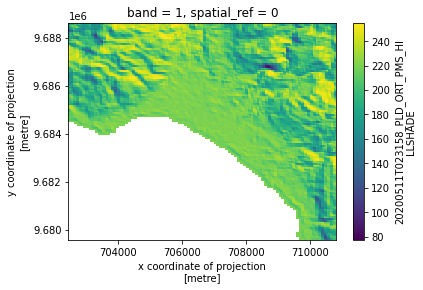

In [13]:
# Plot a subsampled version
band_dict[HILLSHADE][:, ::10, ::10].plot()

In [14]:
# You can also stack those bands
stack = prod.stack(ok_bands)
stack

2021-06-08 16:42:06,100 - eoreader - DEBUG - Loading bands ['RED', 'GREEN', 'NIR']
2021-06-08 16:42:06,100 - eoreader - DEBUG - Read RED
2021-06-08 16:42:09,953 - eoreader - DEBUG - Read GREEN
2021-06-08 16:42:13,851 - eoreader - DEBUG - Read NIR
2021-06-08 16:42:18,043 - eoreader - DEBUG - Loading index ['NDVI']
2021-06-08 16:42:18,982 - eoreader - DEBUG - Loading DEM bands ['HILLSHADE']
2021-06-08 16:42:18,982 - eoreader - DEBUG - Already existing DEM for IMG_PHR1A_PMS_001. Skipping process.
2021-06-08 16:42:19,113 - eoreader - DEBUG - Already existing hillshade DEM for IMG_PHR1A_PMS_001. Skipping process.
2021-06-08 16:42:20,914 - eoreader - DEBUG - Loading Cloud bands ['CLOUDS']


<xarray.DataArray 'NDVI_GREEN_HILLSHADE_CLOUDS' (z: 4, y: 18124, x: 16754)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[217., 203., 203., ..., 193., 193., 213.],
        [203., 203., 203., ..., 193., 193., 193.],
        [203., 203., 203., ..., 193., 193., 193.],
        ...,
        [ nan,  nan,  nan, ..., 174., 174., 174.],
        [ nan,  nan,  nan, ..., 176., 176., 176.],
        [ nan,  nan,  nan, ..., 177., 177., 196.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]], dtype=float32)
Coordinates:
    spatial_ref  int32 0
  * x            (x) float64 7.024e+05 7.024e+05 ... 7.108e+05 7.108e+05
  * y            (y) float64 9.689e+06 9.689e+06 9.689e+06 ... 9.68e+06 9.68e+06
  * z            (z) MultiIndex
  - variable     (z) object 'NDVI' 'GREEN' 'HILLSHADE' 'CLOUDS'
  - band         (z) int64 1 1 1 1
Attributes:
    long_name:  ['NDVI', 'GREEN', 'HILLSHADE', 'CLOUDS']

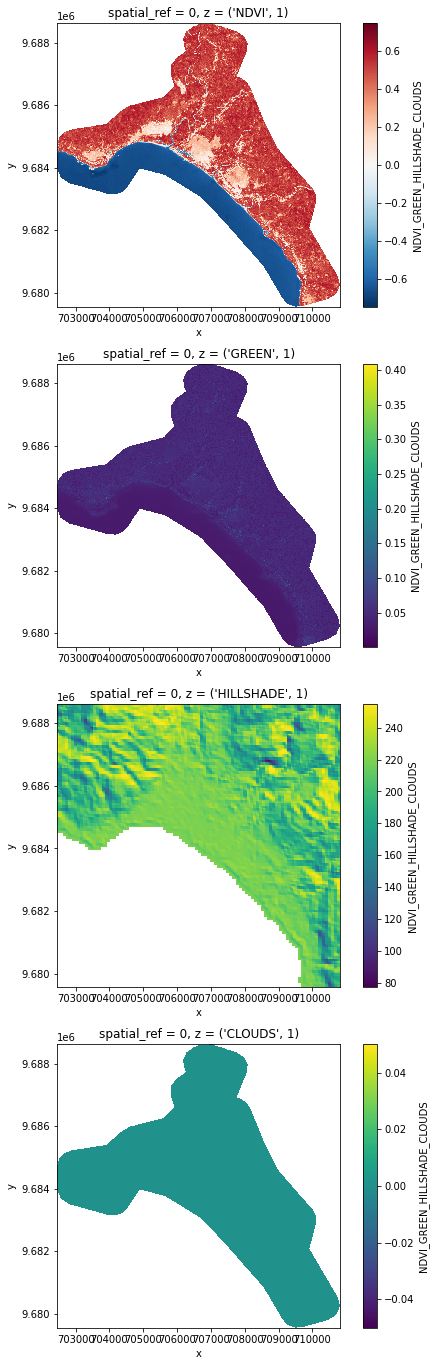

In [15]:
# Error in plotting with a list
if "long_name" in stack.attrs:
    stack.attrs.pop("long_name")

# Plot a subsampled version
import matplotlib.pyplot as plt
nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(2*nrows, 6*nrows), subplot_kw={"box_aspect": 1})
for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])